#### Training Sample: train.csv
#### Evaluation Sample: validation_under.csv
#### Method: OOB
#### Output: Best hyperparameters; Pr-curve; ROC AUC

# Training Part 

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,classification_report, matthews_corrcoef, accuracy_score, average_precision_score, roc_auc_score

#### Input data is read and named as the following

In [7]:
transactions = pd.read_csv('../Data/train.csv')
X_train = transactions.drop(labels='Class', axis=1)
y_train = transactions.loc[:,'Class']

#### Tuning parameters

In [8]:
test = 0
rf = RandomForestClassifier(n_jobs=-1, random_state=1)

if test== 0:
    n_estimators = [75,150,800,1000,1200]
    min_samples_split = [2, 5]
    min_samples_leaf = [1, 5]
else:
    n_estimators = [70]
    min_samples_split = [2]
    min_samples_leaf = [1]

param_grid_rf = {'n_estimators': n_estimators,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_split,
                 'oob_score': [True]
                }

In [9]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,cv = 2,
                       n_jobs=-1, pre_dispatch='2*n_jobs', verbose=1, return_train_score=False)

In [10]:
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 84.9min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_s

#### The best score and the estimator

In [11]:
grid_rf.best_score_

0.99944901497923

In [12]:
grid_rf.best_params_

{'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150,
 'oob_score': True}

# Evaluation Part 

In [13]:
evaluation = pd.read_csv('../Data/validation_under.csv')
X_eval = evaluation.drop(labels='Class', axis=1)
y_eval = evaluation.loc[:,'Class']

In [14]:
def Random_Forest_eval(estimator, X_test, y_test):
    
    y_pred = estimator.predict(X_test)

    print('Classification Report')
    print(classification_report(y_test, y_pred))
    if y_test.nunique() <= 2:
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print('AUPRC', average_precision_score(y_test, y_score))
        print('AUROC', roc_auc_score(y_test, y_score))
    

In [15]:
Random_Forest_eval(grid_rf, X_eval, y_eval)

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       173
           1       1.00      0.77      0.87       173

    accuracy                           0.89       346
   macro avg       0.91      0.89      0.89       346
weighted avg       0.91      0.89      0.89       346

AUPRC 0.9553261695540434
AUROC 0.9536569882054194


### Precision Recall Curve

In [16]:
from sklearn.metrics import precision_recall_curve
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(
    y_eval, grid_rf.predict_proba(X_eval)[:,1])

Text(0.5, 1.0, 'PR_Curve')

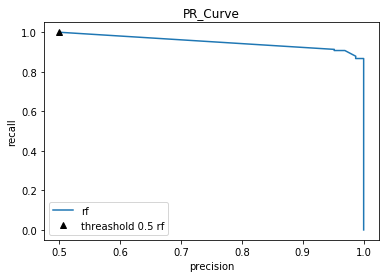

In [17]:
import matplotlib.pyplot as plt
close_default_rf = np.argmin(np.abs(thresholds_rf * 0.5))
plt.plot(precision_rf,recall_rf,label="rf")
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',
        label = "threashold 0.5 rf")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.title("PR_Curve")

### Area Under the Receiver Operating Characteristic Curve

In [18]:
from sklearn.metrics import roc_curve
fpr_rf,tpr_rf,th_rf = roc_curve(
    y_eval, grid_rf.predict_proba(X_eval)[:,1])

Text(0.5, 1.0, 'ROC')

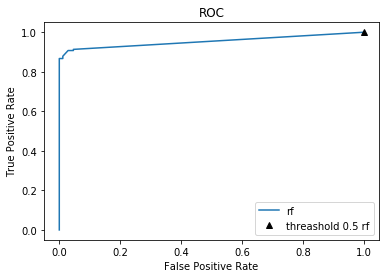

In [19]:
close_default_rf = np.argmin(np.abs(th_rf * 0.5))
plt.plot(fpr_rf,tpr_rf,label="rf")
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',c='k',
        label = "threashold 0.5 rf")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC")